### Test 2 Part 2 Sample Questions

In this part of the test, you will have up to 2 hours to complete several problems that require coding and simulations. Please answer all questions within the notebook, and submit the code if needed. You are allowed to consult the course material in Canvas, but please complete the test yourself within the time limit. Your completed notebook and HTML file must be submitted in Canvas before the stated time limit. 

In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
students = Table().read_table('student_data.csv')


### Hypothesis Testing

Include the following steps in your hypothesis test. 
1. State the null and alternative hypothesis
2. Pick a test statistic
3. Simulate the sampling distribution of the test statistic, under the null model
4. Draw conclusion with regard to null model based on the p-value, using the distribution generated from Step 3. A significance level (cut-off value) of 0.05  used to decide whether the p-value is low enough. 


#### Question 1: 

A gambler at the Graton Casino observed 120 dice rolls and noticed that the number of rolls were not perfectly even. Specifically, he counted the following frequencies for each side of the die: (18, 21, 19, 23, 29, 10). He suspects the die may be loaded. 

What are the null and alternative models? 

Null model: the die is fair (the chance of each side is exactly 1/6)
null_prop = make_array(1/6, 1/6, 1/6, 1/6, 1/6, 1/6) 
Alternative model: the die is not fair (the chance of each side is unequal, at least one is not 1/6)

Based on the Total Variation Distance test statistic, wwhat is value of the test statistic given the observed data? 

In [10]:
# show your code as well as the output of the test statistic
def tvd(prop1, prop2):
    return sum(abs(prop1-prop2))/2

null_prop = make_array(1/6, 1/6, 1/6, 1/6, 1/6, 1/6) 
obs_freq = make_array(18, 21, 19, 23, 29, 10)
obs_prop = obs_freq/sum(obs_freq)
tvd(obs_prop, null_prop)

0.10833333333333334

Simulate the sampling distribution of simulated test statistic based on the null model. 

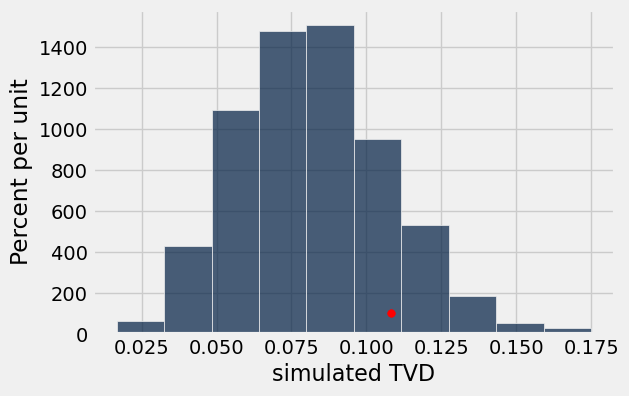

In [15]:
# show your code as well as the output of one simulation 
results_die = make_array()
for i in np.arange(1000):
    sim_prop = sample_proportions(120, null_prop)
    test_stat = tvd(sim_prop, null_prop)
    results_die = np.append(results_die, test_stat)

Table().with_column('simulated TVD', results_die).hist()
plots.scatter(tvd(obs_prop, null_prop), 1, color='red', s=30)

Based on the simulated sampling distribution, what is the p-value and the conclusion of the test? 

In [18]:
# Calcualte 
np.count_nonzero(results_die > tvd(obs_prop, null_prop)) / 1000

# Conclusion: p-value > 0.05. We conclude that the data is consistent with the null model, i.e. the die is probably not loaded. 

0.141

#### Question 2

Based on the student data in ```student_data.csv```, suppose we want to test the hypothesis that students who do not use social networking sites tend to be older in terms of average age. 

What are the null and alternative models? 

In [21]:
print(students.group('SOCIAL'))
students.group('SOCIAL', np.average)

SOCIAL | count
No     | 20
Yes    | 54


SOCIAL,SEX average,COLOR average,ZIP average,MATH average,PAPER average,CAR average,SHOE average,AGE average,HEIGHT average,PETS average
No,,,93893.4,2.9,3.15,nan,8.775,22.95,67.15,1.5
Yes,,,95323.3,2.77778,2.81481,nan,9.11111,22.1296,67.3519,2


Null model: the two groups (Yes and No) have the same mean. (Difference between means = 0)
Alternative model: the NO group has a higher mean than the YES group (mean_of_Yes - mean_of_No < 0)


Suppose we use ```average_of_social_media_users - average_of_non-users``` as the test statistic. Compute the observed test statistic from the student data. 

In [44]:
two_means = students.group('SOCIAL', np.average).column('AGE average')
obs_test_stat = two_means.item(1) - two_means.item(0)

Simulate the sampling distribution of simulated test statistic based on the null model. 

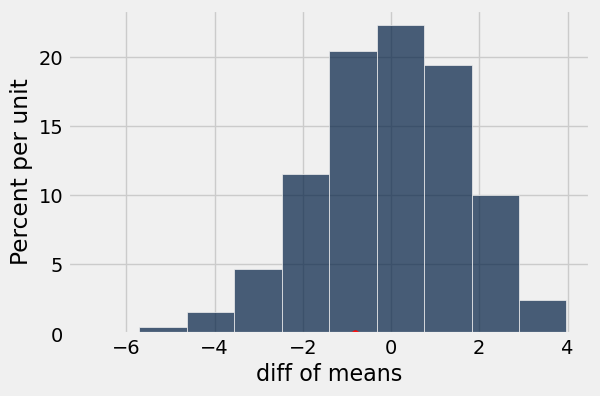

In [45]:
results_social = make_array()
for i in np.arange(1000):
    shuffled_students = students.sample(74, with_replacement=False)
    shuffled_table = Table().with_columns('AGE', students.column('AGE'), 'SOCIAL', shuffled_students.column('SOCIAL'))
    two_sim_means =shuffled_table.group('SOCIAL', np.average).column('AGE average')
    sim_test_stat = two_sim_means.item(1) - two_sim_means.item(0)
    results_social = np.append(results_social, sim_test_stat)
Table().with_column('diff of means', results_social).hist()
plots.scatter(obs_test_stat, 0, color='red', s=30)

What is the p-value and conclusion of the hypothesis test？ 

In [47]:
np.count_nonzero(results_social < obs_test_stat) / 1000
# the p-value is high. So the data is consistent with the null model. (No significant differenc between average age of social media users)

0.298

#### Question 3: 


Based on the student data in ```student_data.csv```, suppose we want to test the hypothesis that there is a difference in the proportion of female and male students who own pets. Use the absolute value of the difference of proportions as a test statistic. Show all step of the hypothesis test as above. 

In [53]:
students.with_column('PET_YN', students.column('PETS') > 0).group('SEX', np.average)

SEX,COLOR average,ZIP average,MATH average,PAPER average,CAR average,SHOE average,AGE average,HEIGHT average,PETS average,SOCIAL average,PET_YN average
Female,,95336.7,2.7561,3.14634,nan,8.39024,23.2195,65.7805,2.46341,,0.853659
Male,,94440,2.87879,2.60606,nan,9.80303,21.2727,69.1818,1.12121,,0.545455


0.3082039911308204


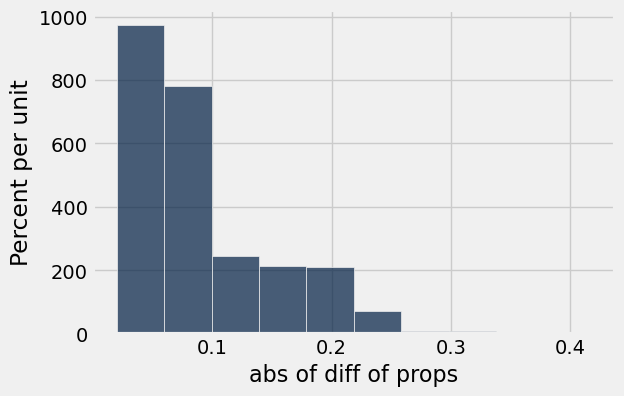

In [61]:
students.with_column('PET_YN', students.column('PETS') > 0).group('SEX', np.average).column('PET_YN average')
obs_diff_prop = abs(pet_props.item(0) - pet_props.item(1))
print(obs_diff_prop)

students_pet_boolean = students.column('PETS') > 0

results_pets = make_array()
for i in np.arange(5000):
    shuffled_students = students.sample(74, with_replacement=False)
    shuffled_sex = shuffled_students.column('SEX')
    shuffled_sex_pet = Table().with_columns('SEX', shuffled_sex, 'PET_YN', students_pet_boolean)
    sim_pet_props = shuffled_sex_pet.group('SEX', np.average).column('PET_YN average')
    sim_test_stat = abs(sim_pet_props.item(0) - sim_pet_props.item(1))
    results_pets = np.append(results_pets, sim_test_stat)

Table().with_column('abs of diff of props', results_pets).hist()


In [64]:
np.count_nonzero(results_pets > obs_diff_prop) / 5000

# the p-value < 0.05. this is evidence consistent with the alternative model. Reject the null. 
# A higher percentage of women own pets than men. 

0.0022

### Question 4: 

A neighborhood has 4500 residents, yet reported 12 violent crimes within the past year. The city popuplation is 120,000 and there were 143 cases of  violent crimes within the past year. Use the crime per resident as a test statistic and conduct a hypothesis test to answer the question: is there evidence that this neiborhood has a higher crime rate than the rest of the city? 

0.0034

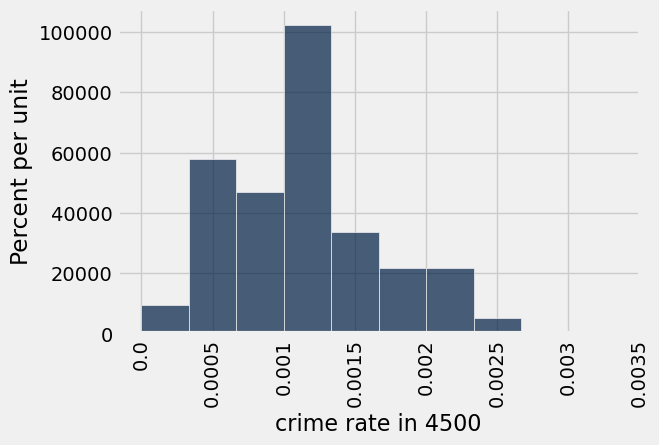

In [76]:
12/4500, 143/120000
#Null model: the neighborhood has same crime rate as the city: 0.0012
# Alternative model: the neighborhood has a higher rate than the city
null_crime = make_array(143/120000, 1-143/120000)

results_crime_rate = make_array()
for i in np.arange(5000):
    sim_crime_rate = sample_proportions(4500, null_crime).item(0)
    results_crime_rate = np.append(results_crime_rate, sim_crime_rate)

Table().with_column('crime rate in 4500', results_crime_rate).hist()
obs_crime_rate = 12/4500
np.count_nonzero(results_crime_rate > obs_crime_rate) / 5000

# p-value ~ 0.004 < 0.05. So this neighborhood does have a higher crime rate than the city 
# reject the null model. 

Use the formula for the standard deviation of sample proportions: $SD = \sqrt{p(1-p)/n}$, find the standard unit (z-score) for the crime rate for this neighborhood. Then use ```stats.norm.cdf``` to compute the p-value based on the Central Limit Theorem.  

In [78]:
from math import sqrt
p0 = 143/120000
z = (obs_crime_rate - p0) / sqrt(p0*(1-p0)/4500)
z
from scipy import stats
1 - stats.norm.cdf(z)

0.0020653493899556175

### Confidence Interval 

Use the bootstrapping method to construct confidence intervals. Show the code you used for simulation, as well as the confidence intervals you found from one simulation. 

### Question 5: 

Use the class data to construct a 90% confidence interval for the percentage of students who drives a car. Note: you may use ```math.isnan``` to handle the missing values. 

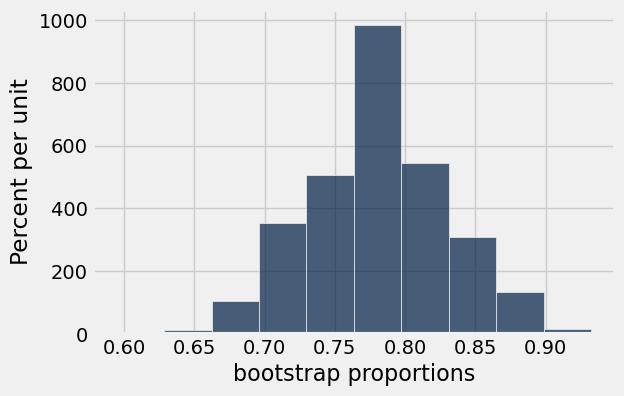

In [85]:
from math import isnan

size = students.num_rows
bootstrap_car_percent = make_array()
for i in np.arange(5000):
    resampled_students = students.sample()
    bootstrap_prop = (size - np.count_nonzero(resampled_students.apply(isnan, 'CAR')))/size
    bootstrap_car_percent = np.append(bootstrap_car_percent, bootstrap_prop)

Table().with_column('bootstrap proportions', bootstrap_car_percent).hist()

In [91]:
# 90% CI
percentile(5, bootstrap_car_percent), percentile(95, bootstrap_car_percent)
# 95% CI
#percentile(2.5, bootstrap_car_percent), percentile(97.5, bootstrap_car_percent)
p_average = np.average(bootstrap_car_percent)
np.std(bootstrap_car_percent), sqrt(p_average * (1-p_average) / 74)

(0.047412930386760026, 0.04789577970222955)

### Question 6: 

Use the class data to construct a 80% confidence interval for the average height of students. 

(66.878378378378372, 67.770270270270274)

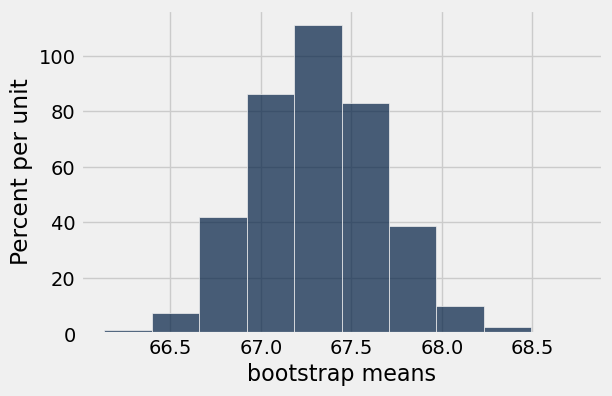

In [93]:
bootstrap_means = make_array()
for i in np.arange(1000):
    bootstrap_one_mean = np.average(students.sample().column('HEIGHT'))
    bootstrap_means = np.append(bootstrap_means, bootstrap_one_mean)

Table().with_column('bootstrap means', bootstrap_means).hist()
percentile(10, bootstrap_means), percentile(90, bootstrap_means)

### Question 7:

Now calculate the confidence interval by the formula: 

 $\text{sample mean} \pm z\cdot SD$

 What value of $z$ should be used for the 80% confidence interval? Show the interval you found by using this formula. Note: you will need to use ```scipy.stats.norm.cdf``` and/or ```scipy.stats.norm.ppf``` 

In [97]:
z80 = stats.norm.ppf(0.9)
sd = np.std(students.column('HEIGHT'))
np.average(students.column('HEIGHT')) - z80*sd/sqrt(74), np.average(students.column('HEIGHT')) + z80*sd/sqrt(74)

(66.834067080646676, 67.760527513947906)

### Question 8: 

To keep the estimate of the average height within 1 inch of the actual parameter, how many students do you need to include in another survey of SRJC students at the 95% confidence level? What about at 90% confidence level?  Assume the sample SD from the class data is the same as the population SD. 

In [105]:
width = 2 # +/- 1 inch
# width = 4*sd/sqrt(n) for 95% confidence level
n = (4*sd / width)**2

# 90%
z = stats.norm.ppf(0.95)
n = (2*z*sd / width)**2
n

26.158198070421392